**Задание**

**Цель:** изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.

**Описание задания:**

Улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

**Этапы работы:**

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.

3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.

  a. Сделайте выводы.

  b. Удалите признаки на основании полученных значений, выводов.

  c. Повторите п. 3, п. 4 на измененных данных.

7. Исследуйте оставленные признаки на выбросы.

  a. Удалите выбросы в случае обнаружения.

  b. Повторите п. 3, п. 4 на измененных данных.

8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.

  a. Повторите п. 3, п. 4 на измененных данных.

9. Сформулируйте выводы по проделанной работе.
  a. Кратко опишите какие преобразования были сделаны с данными.
  b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
  c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.



**1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [ ]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
# Исходный набор данных обозначим data:
data = fetch_california_housing()

In [ ]:
# Датафрейм с признаками:
X = (pd.DataFrame(data['data'], columns = data['feature_names']))
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# Целевая переменная:
y = data['target']
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

Информация о датасете и статистики:

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Все признаки - вещественные числа, категориальных переменных нет. С учетом информации из описания датасета, стат. данные приемлемые.

**2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.**

In [ ]:
import numpy as np

In [ ]:
# Пропусков в датасете нет:
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

**3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
ставленной задачей.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

**4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.**

Построение модели линейной регрессии:

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_1 = LinearRegression()

In [ ]:
model_1.fit(X_train, y_train)

LinearRegression()

Вычисление метрик:

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

Значения метрик на обучающем множестве:

In [ ]:
r2_score(y_train, model_1.predict(X_train))

0.6115704251956471

In [ ]:
mean_squared_error(y_train, model_1.predict(X_train), squared=False)

0.7183744784686894

Значения метрик на тестовом множестве:

In [ ]:
r2_1 = r2_score(y_test, model_1.predict(X_test))
r2_1

0.5743251711424038

In [ ]:
RMSE_1 = mean_squared_error(y_test, model_1.predict(X_test), squared=False)
RMSE_1

0.7561753781213177

**5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?**

Гистограмма значений целевой переменной:

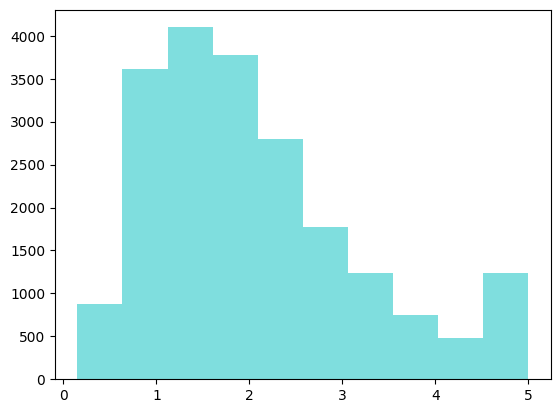

In [ ]:
plt.hist(y, color = 'c', alpha = 0.5)
plt.show()

Распределение не похоже на нормальное, сдивнуто вправо.

Дополнительно построим боксплот.

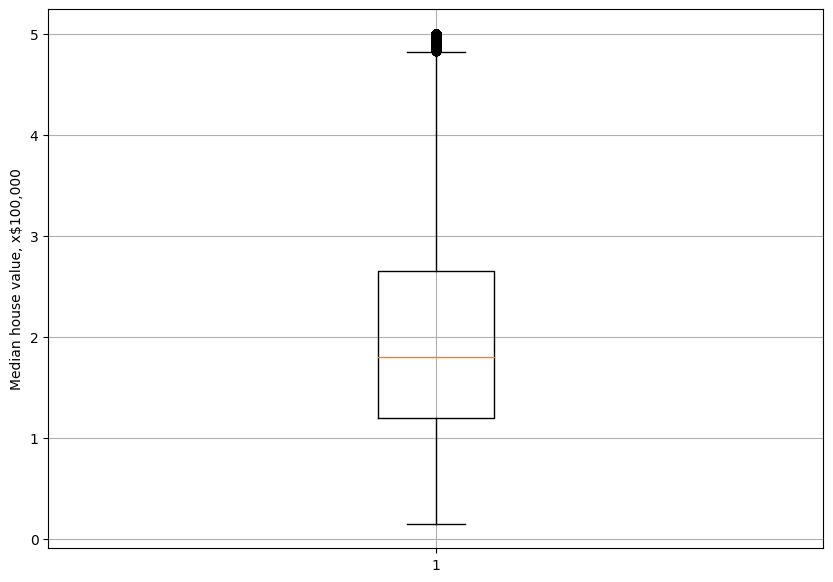

In [ ]:
plt.figure(figsize=(10, 7))
plt.boxplot(y)
plt.grid()
plt.ylabel('Median house value, x$100,000')

plt.show()

Судя по графикам, в датасете есть объекты со стоимостью около $500 000, что больше медианного значения данного датасета в 2,78 раза.

In [ ]:
print(f"Максимальное значение: {y.max():.3f}, медианное значние: {np.median(y)}.")

Максимальное значение: 5.000, медианное значние: 1.797.


Подсчитаем порогове значение целевой переменной, выше которого, согласно боксплоту, значения таргета могут быть выбросами:

In [ ]:
# Первый и третий квартили:
Q1 = np.quantile(y, 0.25)
Q3 = np.quantile(y, 0.75)
# Полтора межквартильных размаха:
IQR = (Q3 - Q1) * 1.5
# Значение, соответствующее окончанию верхнего "уса" боксплота:
upper_wisk = Q3 + IQR
upper_wisk

4.824124999999999

In [ ]:
# Количество объектов со значением таргета >= 4.824:
print(np.sum(y>=upper_wisk))

1071


Исходя из знаний о мире, Калифорния - локация с дорогим жильем (в том числе в 1990 г, когда собирался данный датасет), поэтому считать подозрительные значения выбросами, тем более с учетом их количества в датасете (1071), пока не вижу оснований.

**6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.**

 **a. Сделайте выводы.**

In [ ]:
X_corr = X.corr()
X_corr.style.background_gradient(cmap='Pastel1')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


Выводы: большинство признаков коррелируют с другими слабо.

Сильная связь (коэфф. корреляции 0,847) между средним количеством комнат и средним количеством спален (в США количество комнат в жилье принято считать именно по количеству спален).

Среднее количество комнат слабо положительно коррелирует с доходом домохозяйства (коэффициент 0,327: больше доход хоязев = больше дом), но с количеством спален при этом связано меньшим по модулю отриательным коэффициентом (-0,062, т.е. связи почти нет). Предположу, что с ростом дохода люди при выборе дома отдают предпочтение не числу спален, а более просторным другим комнатам (кухня, гостиная, кабинет, т.д.), которые увеличивают общую площадь дома.

Сильную отрицательную корреляцию (-0,925) между широтой и долготой можно объяснить неравномерностью заселения территории (в более комфортных, благополучных, потенциально прибыльных местностях люди селятся чаще).


При дальнейшей работе с датасетом нужно будет учитывать пары коррелирующих признаков, т.к. это может негативно повлиять на качество модели (возможно, такие признаки придется исключить).

С помощью цикла выполним последовательное удаление следующих признаков из датасета: 'MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude'; для каждого случая определим метрики.

In [ ]:
# Признаки, которые будем удалять из датасета:
drop_list = ['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']

print(f"Исходные значения метрик:\nна обучающем множестве: R2={r2_score(y_train, model_1.predict(X_train)):.4f}, RMSE={mean_squared_error(y_train, model_1.predict(X_train), squared=False):.4f};")
print(f"на тестовом множестве: R2={r2_score(y_test, model_1.predict(X_test)):.4f}, RMSE={mean_squared_error(y_test, model_1.predict(X_test), squared=False):.4f}. \n")

# Датафрейм, в который сведем полученные результаты:
df_result = pd.DataFrame({'Dropped_feature':[], 'R2_train':[], 'RMSE_train':[], 'R2_test':[], 'RMSE_test':[]})

for i, column_to_drop in enumerate(drop_list):
  # Удаление признака:
  X_drop = X.drop(columns=column_to_drop)

  # Разделение на train и test (80/20):
  X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_drop, y, test_size=0.2, random_state=9)

  # Обучение модели
  model_new = LinearRegression()
  model_new.fit(X_new_train, y_new_train)

  # Рассчет метрик
  r2_train = r2_score(y_new_train, model_new.predict(X_new_train))
  RMSE_train = mean_squared_error(y_new_train, model_new.predict(X_new_train), squared=False)

  r2_test = r2_score(y_new_test, model_new.predict(X_new_test))
  RMSE_test = mean_squared_error(y_new_test, model_new.predict(X_new_test), squared=False)

  # Заполнение датафрейма с результатами:
  df_result.loc[i, ['Dropped_feature', 'R2_train', 'RMSE_train', 'R2_test', 'RMSE_test']] = [column_to_drop, r2_train, RMSE_train,  r2_test, RMSE_test]

df_result



Исходные значения метрик:
на обучающем множестве: R2=0.6116, RMSE=0.7184;
на тестовом множестве: R2=0.5743, RMSE=0.7562. 



,Dropped_feature,R2_train,RMSE_train,R2_test,RMSE_test
0,MedInc,0.399110,0.893495,0.397224,0.899832
1,AveRooms,0.602886,0.726360,0.583101,0.748340
2,AveBedrms,0.597306,0.731446,0.590532,0.741641
3,Latitude,0.545665,0.776931,0.510579,0.810821
4,Longitude,0.547495,0.775365,0.513419,0.808465


Удаление признаков 'MedInc', 'Latitude', 'Longitude' ухудшают метрики.

Исходя из сравнения оставшихся результатов, для улучшения метрик модели удалим признак 'AveBedrms' - метрики на тестовом множестве для данного случая лучше остальных.

 **b. Удалите признаки на основании полученных значений, выводов.**

In [ ]:
X.drop(columns='AveBedrms', inplace=True)
X[:3]

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24


In [ ]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude',
       'Longitude'],
      dtype='object')

 **c. Повторите п. 3, п. 4 на измененных данных.**

In [ ]:
# Обучение новой модели:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

model_2 = LinearRegression()
model_2.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Рассчет метрик
r2_score(y_train, model_2.predict(X_train))

0.5973061267129086

In [ ]:
mean_squared_error(y_train, model_2.predict(X_train), squared=False)

0.7314459864519206

In [ ]:
r2_2 = r2_score(y_test, model_2.predict(X_test))
r2_2

0.5905317015738731

In [ ]:
RMSE_2 = mean_squared_error(y_test, model_2.predict(X_test), squared=False)
RMSE_2

0.7416409285690639

**7. Исследуйте оставленные признаки на выбросы.**

  **a. Удалите выбросы в случае обнаружения.**

  **b. Повторите п. 3, п. 4 на измененных данных.**

In [ ]:
# Основные статистики признаков:
X.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,35682.000000,1243.333333,41.950000,-114.310000


По данным таблицы со статистиками, значения широты и долготы в пределах разумного, аналогично с возрастом домов. В остальных признаках могут присутствовать выбросы, для проверки воспользуемся боксплотами.

In [ ]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude',
       'Longitude'],
      dtype='object')

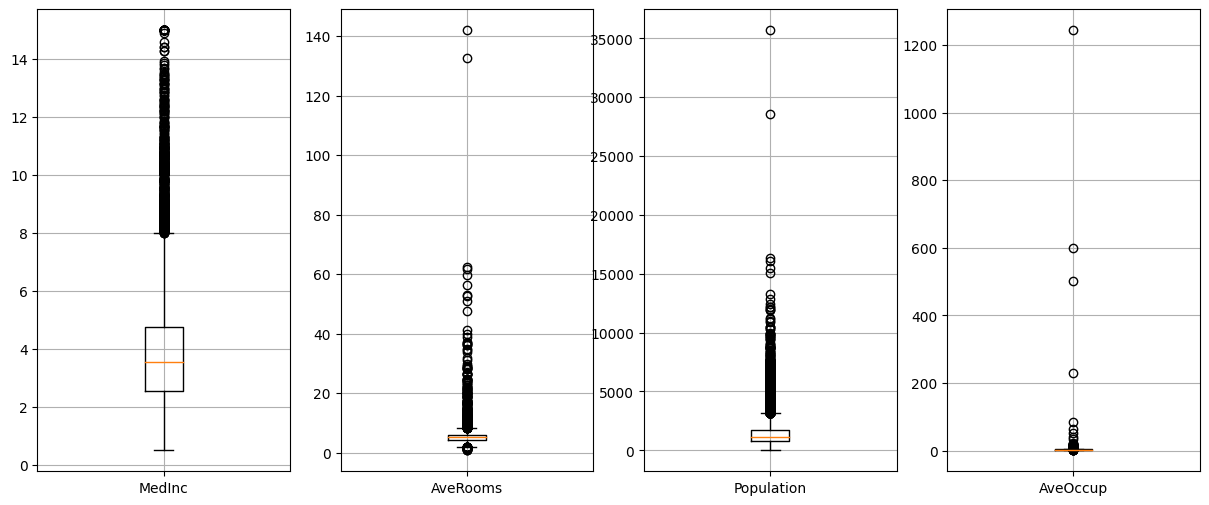

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(141)
plt.boxplot(X[['MedInc']], labels=['MedInc'])
plt.grid()

plt.subplot(142)
plt.boxplot(X[['AveRooms']], labels=['AveRooms'])
plt.grid()

plt.subplot(143)
plt.boxplot(X[['Population']], labels=['Population'])
plt.grid()

plt.subplot(144)
plt.boxplot(X[['AveOccup']], labels=['AveOccup'])
plt.grid()

plt.show()

Т.к. датасет собран для групп домохозяйств (что следует из его описания), то значения признаков, которые по графикам сильно отличаются от остальной совокупности, могут и не быть выбросами.

Попробуем удалиить значения 'Averooms' > 125, 'Population' > 27500 и 'AveOccup' > 200 и посмотрим, как это повлияет на метрики на тестовом множестве.

In [ ]:
# Соберем признаки и целевую переменную в единый датасет, чтобы количество объектов не поменялось после удаления части строк:
y_tmp = pd.DataFrame(y, columns=['target'])
X_tmp =  X.join(y_tmp)
X_tmp[:2]

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585


In [ ]:
# Отфильтруем строки по выбранным условиям и исключим их из датасета:
X_tmp1 = X_tmp[~(X_tmp.AveRooms > 125) & ~(X_tmp.Population >27500) & ~(X_tmp.AveOccup >200)]
X_tmp.shape, X_tmp1.shape

((20640, 8), (20632, 8))

Всего исключено 8 объектов (строк).

In [ ]:
# Новый датафрейм с признаками и вектор с целевой переменной:
X_tmp2 = X_tmp1.drop(columns='target')
y_tmp2 = X_tmp1['target']

In [ ]:
# Разделение на обучающую и тестовую выборки:
X_new_train2, X_new_test2, y_new_train2, y_new_test2 = train_test_split(X_tmp2, y_tmp2, test_size=0.2, random_state=9)

# Обучение модели
model_2 = LinearRegression()
model_2.fit(X_new_train2, y_new_train2)

LinearRegression()

In [ ]:
# Рассчет метрик
r2_score(y_new_train2, model_2.predict(X_new_train2))

0.6130971123603326

In [ ]:
mean_squared_error(y_new_train2, model_2.predict(X_new_train2), squared=False)

0.718323765125525

In [ ]:
r2_3 = r2_score(y_new_test2, model_2.predict(X_new_test2))
r2_3

0.6287628950312532

In [ ]:
RMSE_3 = mean_squared_error(y_new_test2, model_2.predict(X_new_test2), squared=False)
RMSE_3

0.7005107223904773

Метрики еще немного улучшились.

**8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.**

  **a. Повторите п. 3, п. 4 на измененных данных.**

Изменим математически следующие признаки:
* 'Population' - возьмем логарифм,
* 'AveRooms' - извлекем корень квадратный.

In [ ]:
# Новые признаки:
X_tmp2['Population_log'] = np.log(X_tmp2.Population)
X_tmp2['AveRooms_root'] = np.sqrt(X_tmp2.AveRooms)

In [ ]:
# Удаление исходных признаков 'Population', 'AveRooms':
X_tmp2.drop(columns=['Population', 'AveRooms'], inplace=True)

In [ ]:
X_tmp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20632 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MedInc          20632 non-null  float64
 1   HouseAge        20632 non-null  float64
 2   AveOccup        20632 non-null  float64
 3   Latitude        20632 non-null  float64
 4   Longitude       20632 non-null  float64
 5   Population_log  20632 non-null  float64
 6   AveRooms_root   20632 non-null  float64
dtypes: float64(7)
memory usage: 1.3 MB


In [ ]:
X_new_train3, X_new_test3, y_new_train3, y_new_test3 = train_test_split(X_tmp2, y_tmp2, test_size=0.2, random_state=9)

# Обучение модели
model_3 = LinearRegression()
model_3.fit(X_new_train3, y_new_train3)

LinearRegression()

In [ ]:
# Рассчет метрик
r2_score(y_new_train3, model_3.predict(X_new_train3))

0.6121681536885217

In [ ]:
mean_squared_error(y_new_train3, model_3.predict(X_new_train3), squared=False)

0.7191856002881181

In [ ]:
r2_4  = r2_score(y_new_test3, model_3.predict(X_new_test3))
r2_4

0.6288355459395143

In [ ]:
RMSE_4 = mean_squared_error(y_new_test3, model_3.predict(X_new_test3), squared=False)
RMSE_4

0.7004421742446811

Метрики улучшились, но совсем незначительно.

**9. Сформулируйте выводы по проделанной работе.**

  **a. Кратко опишите какие преобразования были сделаны с данными.**

В процессе выполнения заданий отработаны навыки подготовки данных для решения задачи повышения качества модели линейной регрессии. Для этого выполнены проверки на наличие выбросов целевой переменной и признаков; проверка пар признаков на предмет их возможной корреляции, удаление и математические преобразование признаков. На каждом шаге оценивалось качество модели.
Над данными выполнены следующие преобразования:
* Удаление части объектов, признаки которых были отнесены к выбросам;
* Математические преобразования двух признаков (логарифмирование и извлечение корня).

  **b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.**

После каждого преобразования метрики немного улучшались, как видно из таблицы ниже:

In [ ]:
df_metrics = pd.DataFrame({'Model':['1', '2','3', '4'], 'RMSE_test': [RMSE_1, RMSE_2, RMSE_3, RMSE_4], 'R2_test': [r2_1, r2_2, r2_3, r2_4],
                           'Features':[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'],
                                       ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude'],
                                       ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude'],
                                       ['MedInc', 'HouseAge', 'AveOccup', 'Latitude', 'Longitude', 'Population_log', 'AveRooms_root']
                                       ]})
df_metrics

,Model,RMSE_test,R2_test,Features
0,1,0.756175,0.574325,"[MedInc, HouseAge, AveRooms, AveBedrms, Popula..."
1,2,0.741641,0.590532,"[MedInc, HouseAge, AveRooms, Population, AveOc..."
2,3,0.700511,0.628763,"[MedInc, HouseAge, AveRooms, Population, AveOc..."
3,4,0.700442,0.628836,"[MedInc, HouseAge, AveOccup, Latitude, Longitu..."


  **c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.**

Суть процесса и последовательность рабоы с данными понятны, для данной (учебной) задачи модели вполне функциональны, но для реальной задачи полученные в итоге метрики были бы недостаточно хороши (значение ошибки RMSE = 0.7 (70%) - слишком большое).

Чтобы улучшить их, можно было бы попробовать следующие варианты:
* удалить объекты, для которых значения целевой переменной подозревались на "промахи";
* удалить большее количество промахов в признаках;
* провести стандартизацию значений признаков;
* поработать с другими математическими преобразованиями признаков.